In [218]:
import matplotlib.pyplot as plt
import pandas as pd

In [219]:
df = pd.read_csv('datasets/decisionTree_Data.csv')

In [220]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [221]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:,2].values

In [222]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [223]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [224]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [225]:
from sklearn.tree import DecisionTreeClassifier

In [226]:
df.shape[1]

3

In [227]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=2)

In [228]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2)

In [229]:
y_pred = clf.predict(X_test)

In [230]:
from sklearn.metrics import mean_absolute_error, accuracy_score

In [231]:
mean_absolute_error(y_test,y_pred)

0.1625

In [232]:
accuracy_score(y_pred,y_test)

0.8375

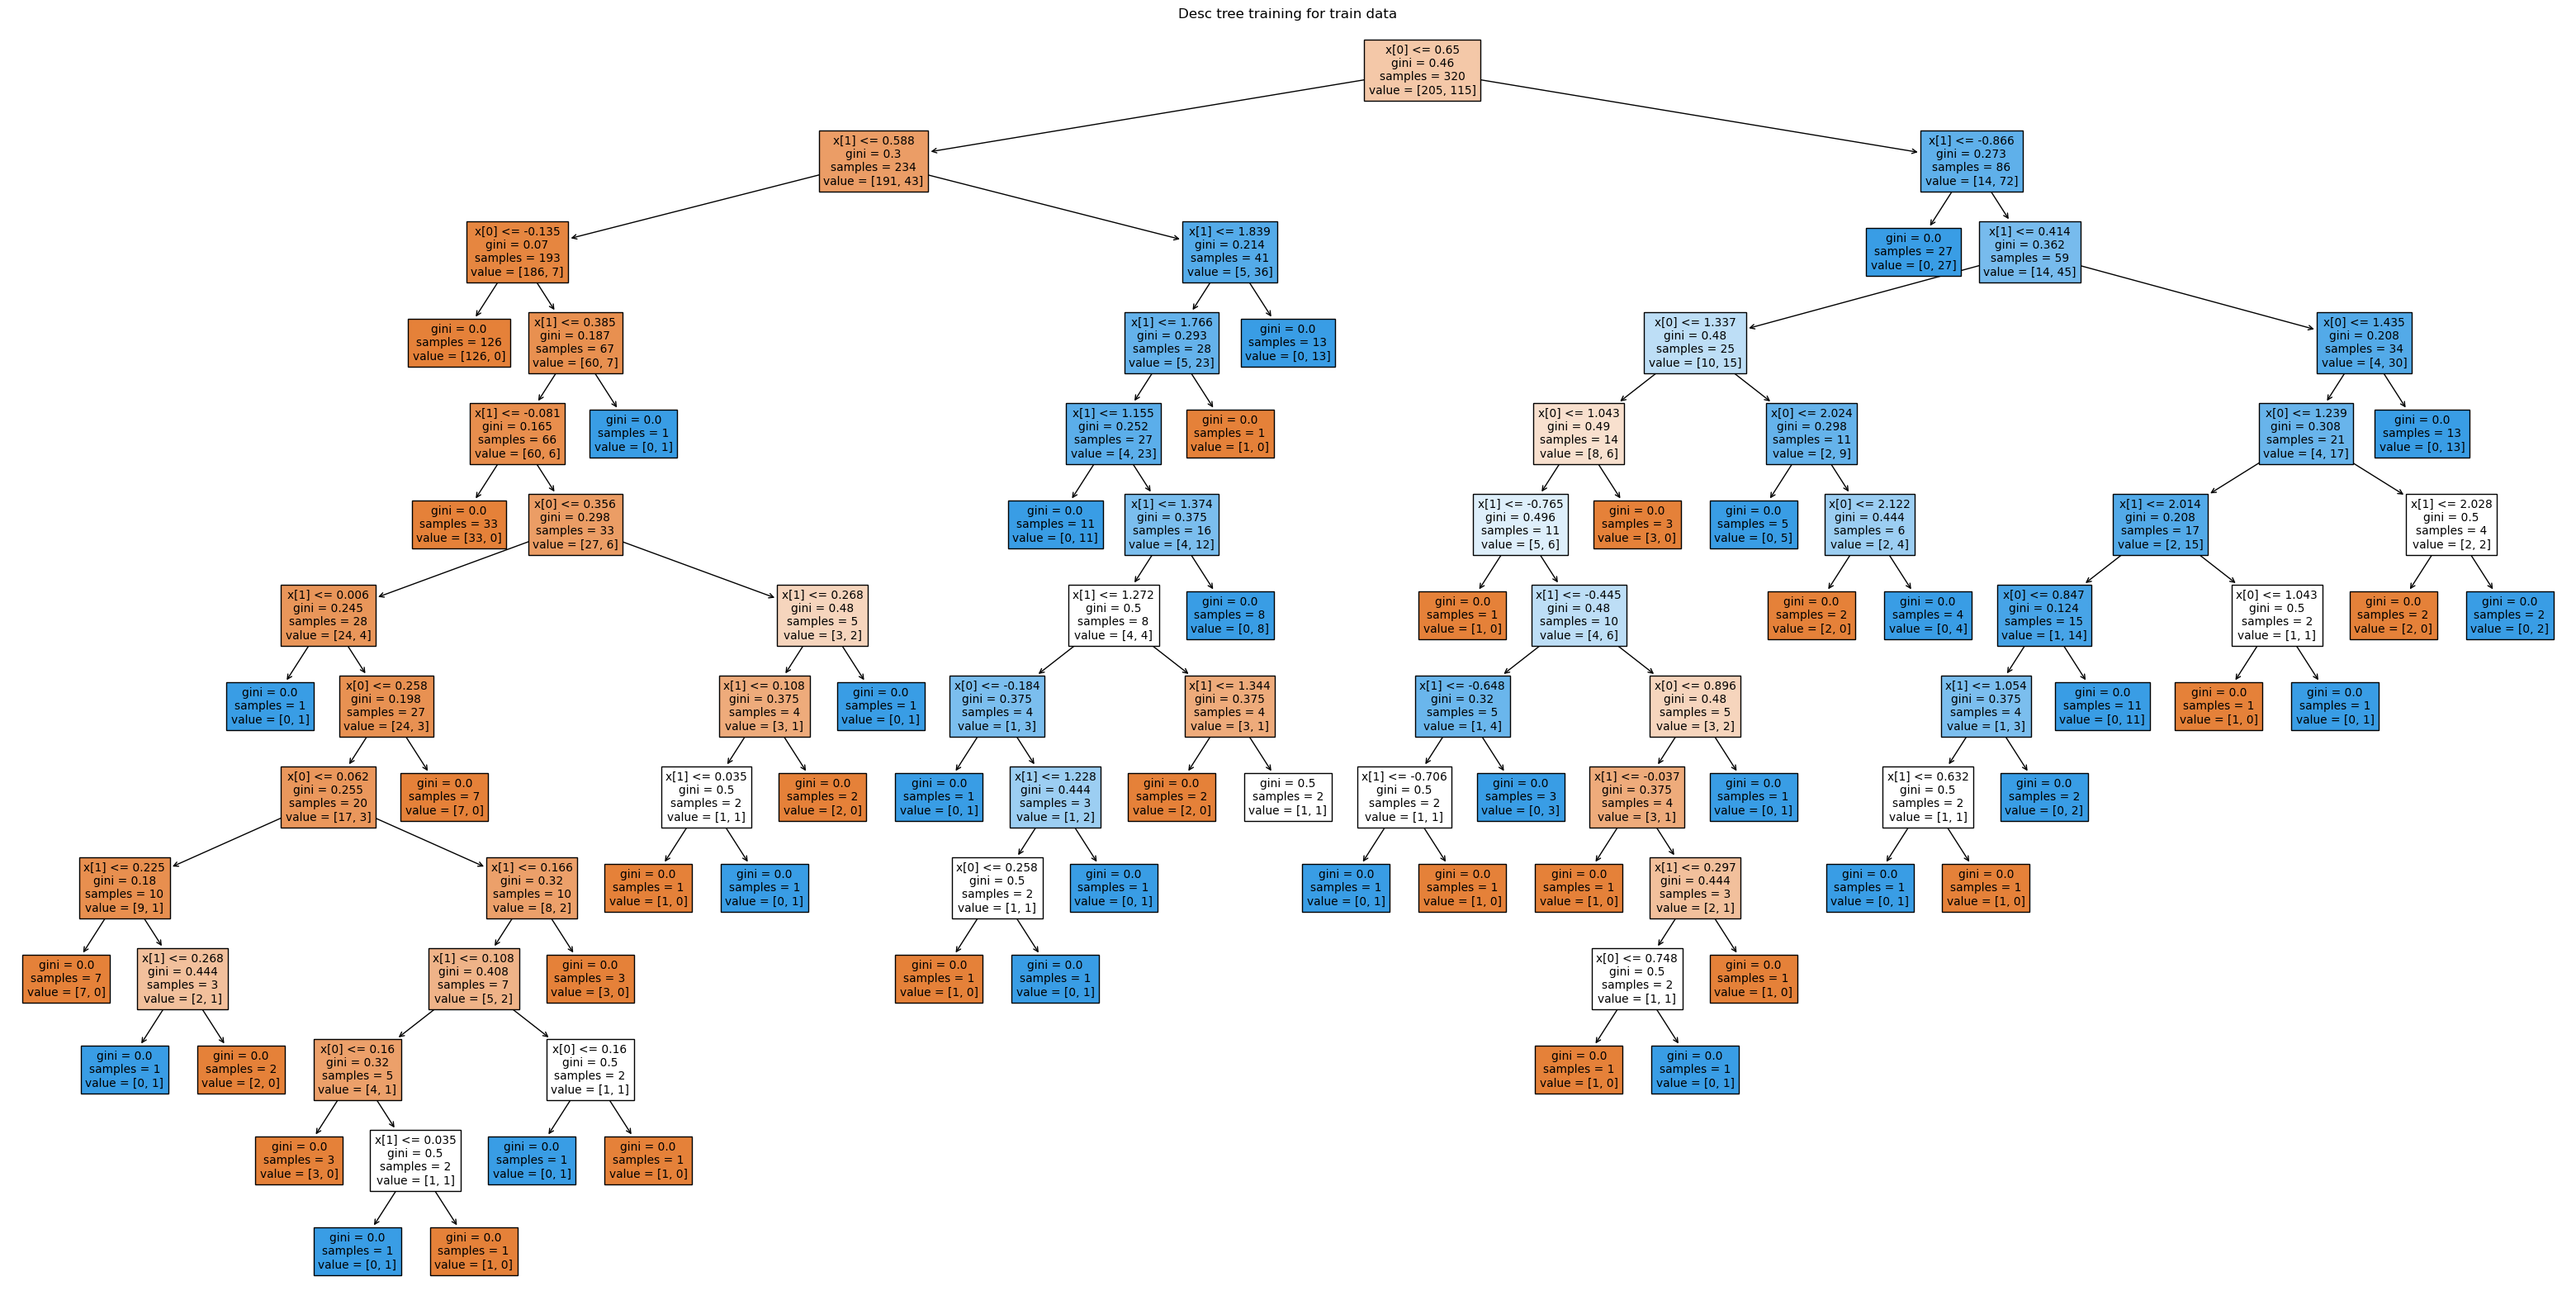

In [233]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
plt.figure(figsize=(40,20))
clf = clf.fit(X_train,y_train)
plot_tree(clf,filled=True)
plt.title('Desc tree training for train data')
plt.show()

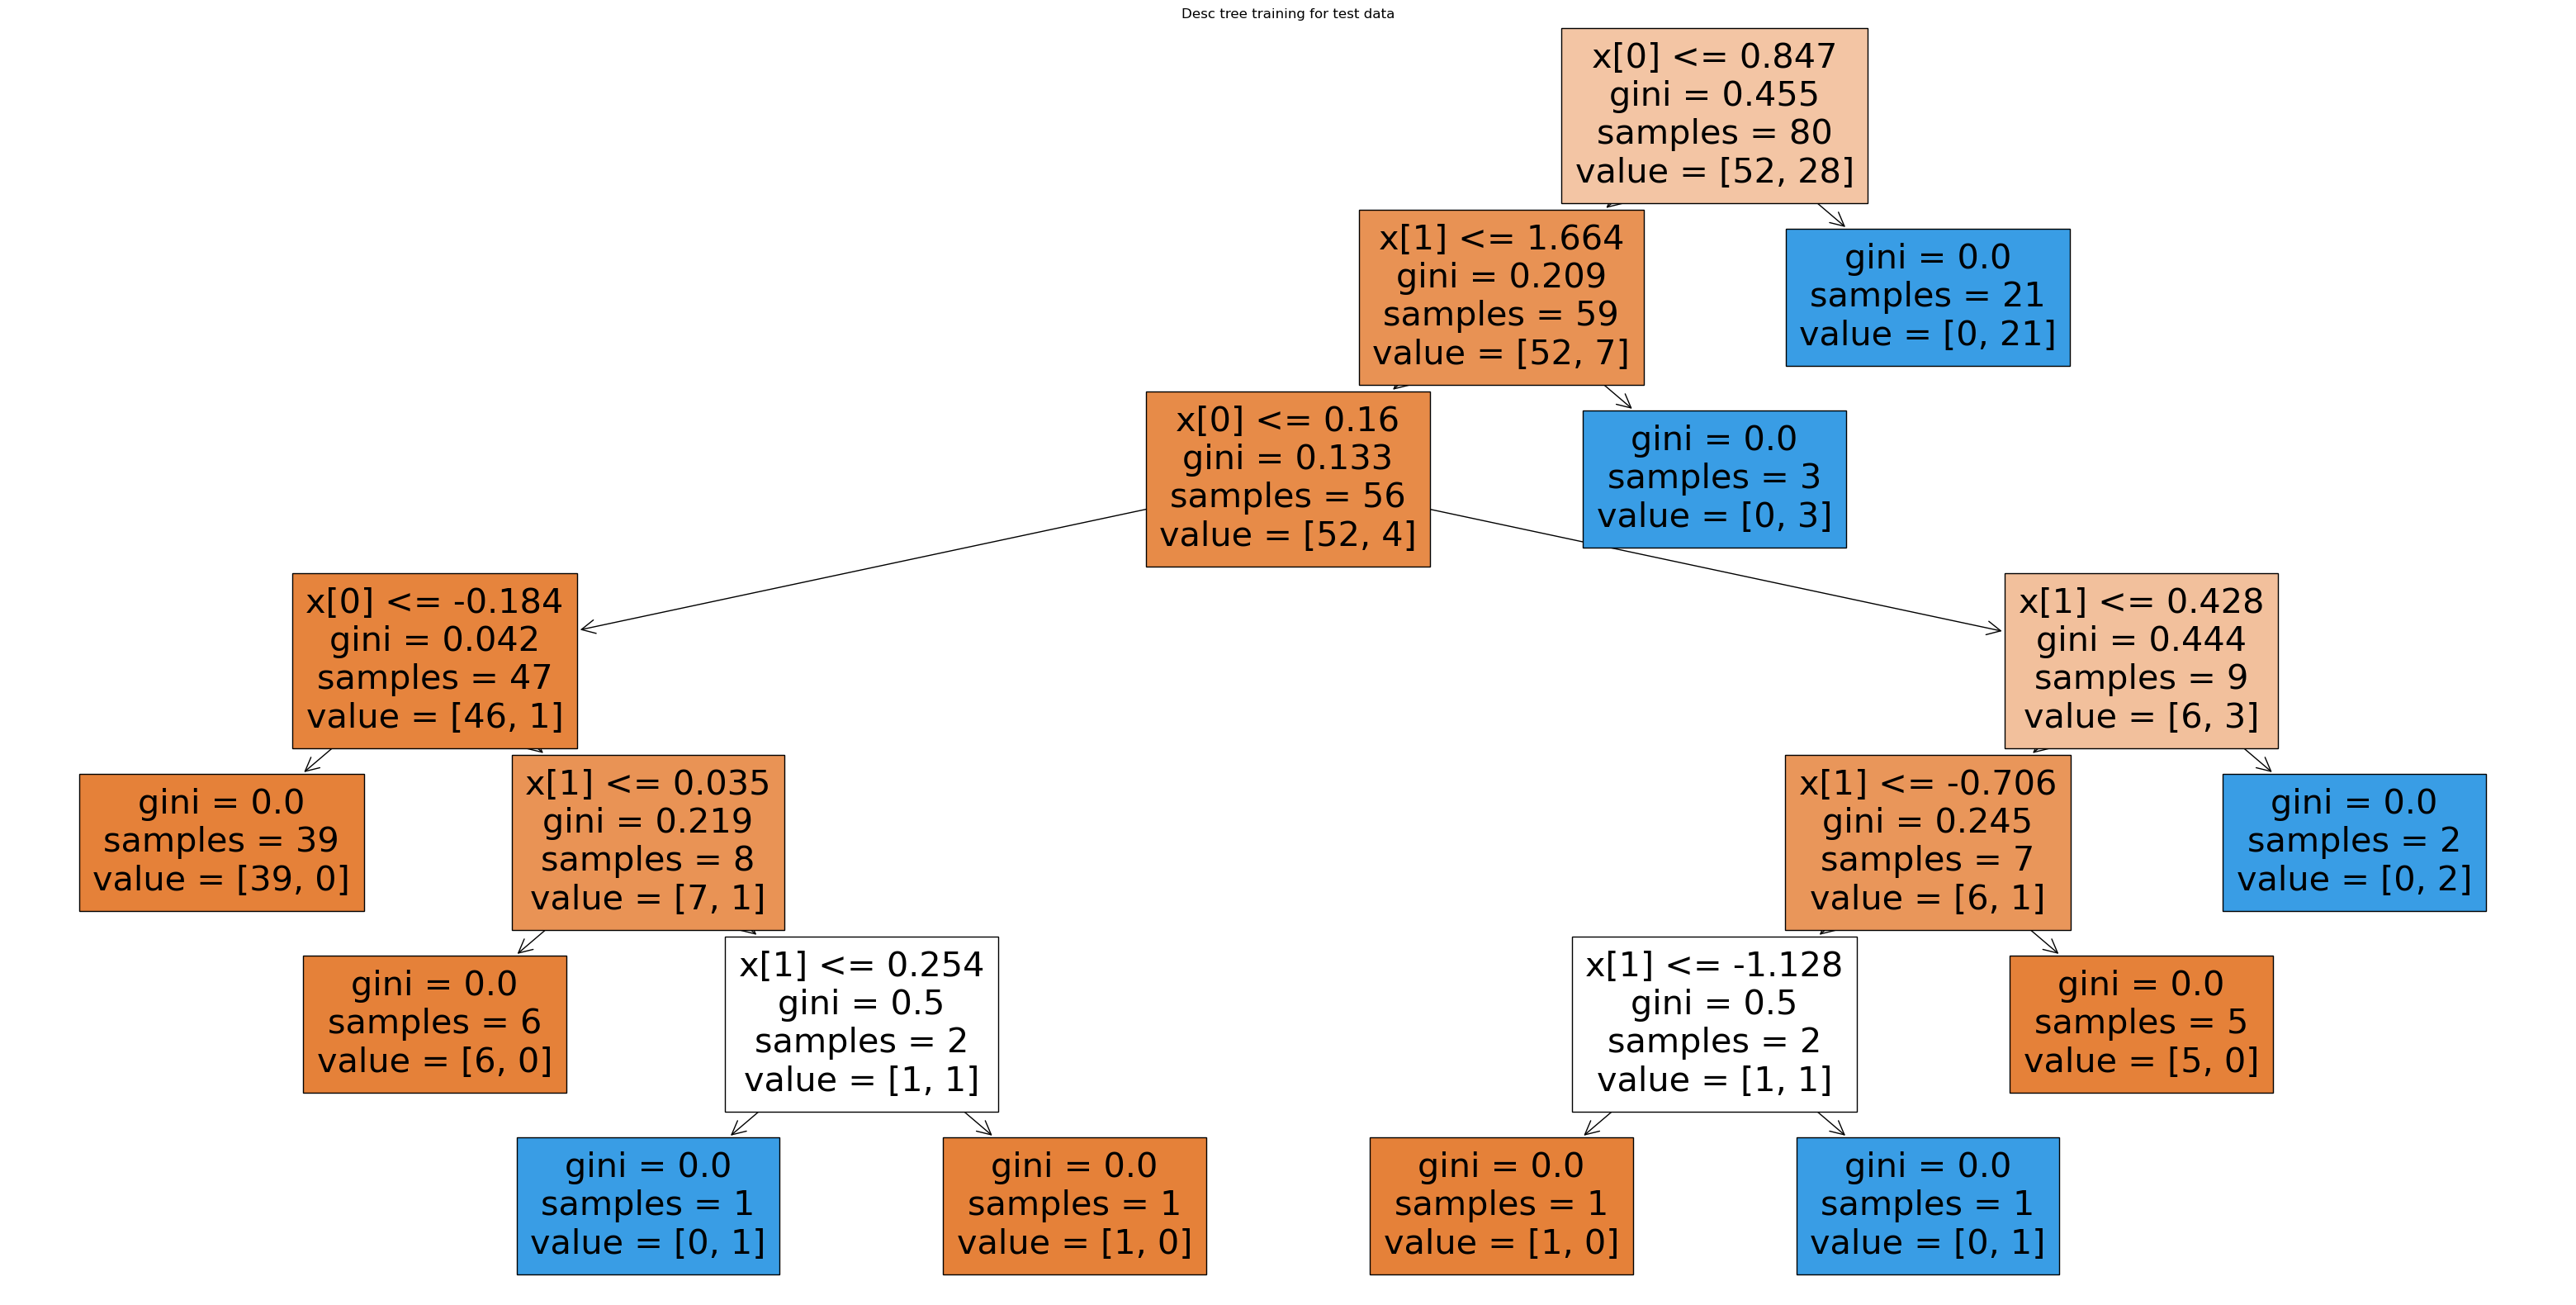

In [234]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
plt.figure(figsize=(40,20))
clf = clf.fit(X_test,y_test)
plot_tree(clf,filled=True)
plt.title('Desc tree training for test data')
plt.show()

In [235]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

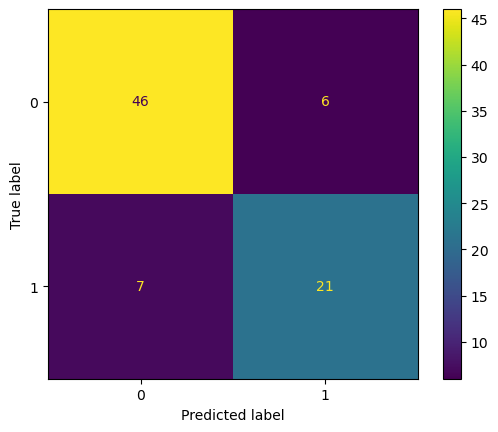

In [236]:
cm = confusion_matrix(y_test,y_pred,labels=clf.classes_)
displ = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
displ.plot()
plt.show()

In [237]:
def confusion_matrix(y_actual,y_pred):
    TP,FP,TN,FN=0,0,0,0
    for i in range(len(y_pred)):
        if y_actual[i]==y_pred[i]:
            TP+=1
        if (y_pred[i]==1) and (y_actual[i]!=y_pred[i]):
            FP+=1
        if (y_pred[i]==0) and (y_actual[i]!=y_pred[i]):
            FN+=1
        if y_pred[i]==y_test[i]==0:
            TN+=1
    print('TP',TP)
    print('TN',TN)
    print('FP',FP)
    print('FN',FN)    
confusion_matrix(y_test,y_pred)

TP 67
TN 46
FP 6
FN 7
